In [1]:
import pandas as pd
# import brad_lib as bk
%matplotlib inline
# import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Import data

In [2]:
# df = pd.read_excel('../../../3_Data/alex_data2.xlsx')
df = pd.read_csv('./../soton_rmethod/soton_aquality.csv')

## FIlter cols to useful vars

In [3]:
dff = df[[
    'date',
#     'date',
#     'year',
#     'month',
    'total_ed_attendance',
    'total_admissions_from_ed',
    
    'air_temp_ave',
    'air_temp_min',
    'air_temp_max',
    'relative_humidity_percrh',
    
    'pm10_ugm3',
    'pm2_5_ugm3',
    'nitrogen_dioxide_ug_m3',
    'nitric_oxide_ug_m3',
#     'oxides_of_nitrogen_ug_m3_as_no2', # 200+ misisng vals
    'ozone_ug_m3',
    'sulphur_dioxide_ug_m3',
    
    'pos_virus_perc',
    'phe_resp_virus_tests_total',
        ]]

# Missing values sorting out

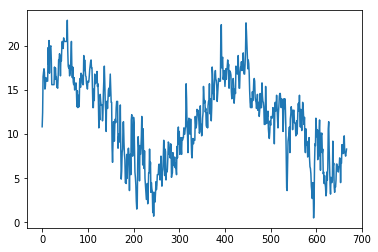

In [5]:
dff['air_temp_ave'].plot()

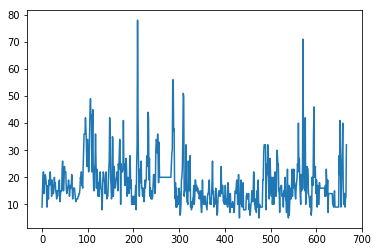

In [6]:
dff['pm10_ugm3'].plot()

#### forward filling for now

In [7]:
dff = dff.ffill()

In [8]:
dff.isnull().sum()

date                          0
total_ed_attendance           0
total_admissions_from_ed      0
air_temp_ave                  0
air_temp_min                  0
air_temp_max                  0
relative_humidity_percrh      0
pm10_ugm3                     0
pm2_5_ugm3                    0
nitrogen_dioxide_ug_m3        0
nitric_oxide_ug_m3            0
ozone_ug_m3                   0
sulphur_dioxide_ug_m3         0
pos_virus_perc                0
phe_resp_virus_tests_total    0
dtype: int64

2months of  values missing at start of air temp variable

In [9]:
dff = dff.dropna(how='any')

In [10]:
dff.shape

(667, 15)

# begin cleaning for python possion model

In [13]:
df.columns

Index(['date', 'date.1', 'total_ed_attendance', 'total_admissions_from_ed',
       'air_temp_ave', 'air_temp_min', 'air_temp_max',
       'relative_humidity_percrh', 'pm10_ugm3', 'pm2_5_ugm3',
       'nitrogen_dioxide_ug_m3', 'nitric_oxide_ug_m3', 'ozone_ug_m3',
       'sulphur_dioxide_ug_m3', 'pos_virus_perc',
       'phe_resp_virus_tests_total'],
      dtype='object')

In [14]:
df.head()

,date,date.1,total_ed_attendance,total_admissions_from_ed,air_temp_ave,air_temp_min,air_temp_max,relative_humidity_percrh,pm10_ugm3,pm2_5_ugm3,nitrogen_dioxide_ug_m3,nitric_oxide_ug_m3,ozone_ug_m3,sulphur_dioxide_ug_m3,pos_virus_perc,phe_resp_virus_tests_total
0,2014-06-04,2014-06-04,12,3,10.83,8.4,13.9,75.5,9.0,6.0,30.0,11.0,41.0,2.0,0.166667,6
1,2014-06-05,2014-06-05,7,3,12.43,9.0,15.6,71.9,15.0,9.0,30.0,13.0,41.0,2.0,0.000000,4
2,2014-06-06,2014-06-06,6,4,16.50,10.4,21.4,79.1,19.0,11.0,30.0,10.0,54.0,2.0,0.000000,4
3,2014-06-07,2014-06-07,12,7,17.02,14.6,19.4,68.3,22.0,14.0,35.0,11.0,47.0,2.0,0.090909,11
4,2014-06-08,2014-06-08,13,9,17.40,13.4,21.3,83.2,14.0,10.0,23.0,6.0,47.0,1.0,0.000000,0


# corr

In [15]:
df.corr()

,total_ed_attendance,total_admissions_from_ed,air_temp_ave,air_temp_min,air_temp_max,relative_humidity_percrh,pm10_ugm3,pm2_5_ugm3,nitrogen_dioxide_ug_m3,nitric_oxide_ug_m3,ozone_ug_m3,sulphur_dioxide_ug_m3,pos_virus_perc,phe_resp_virus_tests_total
total_ed_attendance,1.000000,0.848211,-0.328585,-0.279315,-0.353876,0.074403,0.057889,0.022643,0.082691,0.055457,-0.090638,0.139588,0.263640,0.112920
total_admissions_from_ed,0.848211,1.000000,-0.294619,-0.267455,-0.300465,0.041540,0.046517,0.010077,0.066861,0.060888,-0.063477,0.137769,0.219930,0.145143
air_temp_ave,-0.328585,-0.294619,1.000000,0.961169,0.963939,0.098814,-0.082783,-0.133021,-0.321599,-0.261911,0.185289,-0.297942,-0.424666,-0.429162
air_temp_min,-0.279315,-0.267455,0.961169,1.000000,0.874774,0.107631,-0.086791,-0.155150,-0.312521,-0.285801,0.170941,-0.293420,-0.397218,-0.398193
air_temp_max,-0.353876,-0.300465,0.963939,0.874774,1.000000,0.061586,-0.064477,-0.082284,-0.314487,-0.236962,0.177855,-0.294730,-0.431572,-0.441453
relative_humidity_percrh,0.074403,0.041540,0.098814,0.107631,0.061586,1.000000,0.077995,0.042823,0.107579,0.117292,-0.222364,0.042186,-0.036954,-0.061009
pm10_ugm3,0.057889,0.046517,-0.082783,-0.086791,-0.064477,0.077995,1.000000,0.856195,0.278844,0.460085,-0.310047,0.307378,0.140638,0.101025
pm2_5_ugm3,0.022643,0.010077,-0.133021,-0.155150,-0.082284,0.042823,0.856195,1.000000,0.317666,0.494615,-0.407795,0.300872,0.078370,0.051806
nitrogen_dioxide_ug_m3,0.082691,0.066861,-0.321599,-0.312521,-0.314487,0.107579,0.278844,0.317666,1.000000,0.527806,-0.553200,0.342549,0.198903,0.271857
nitric_oxide_ug_m3,0.055457,0.060888,-0.261911,-0.285801,-0.236962,0.117292,0.460085,0.494615,0.527806,1.000000,-0.519275,0.661169,0.190361,0.187669


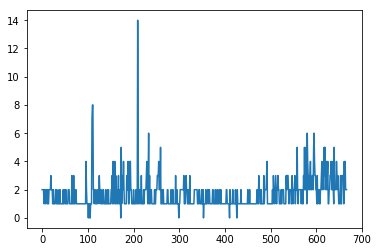

In [16]:
df.sulphur_dioxide_ug_m3.plot()

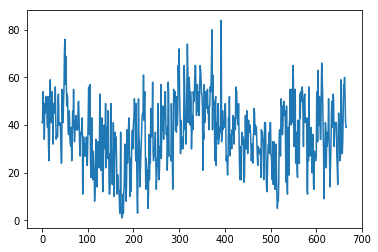

In [17]:
df.ozone_ug_m3.plot()

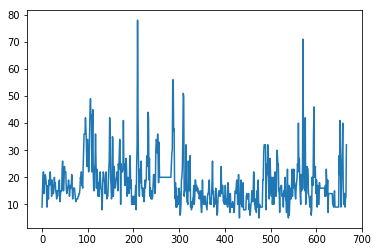

In [18]:
df.pm10_ugm3.plot()

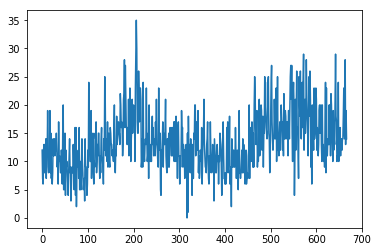

In [19]:
df.total_ed_attendance.plot()

# Poisson

In [20]:
Y = dff['total_ed_attendance']
X = dff[['phe_resp_virus_tests_total', 'air_temp_ave', 'pm10_ugm3',
       'relative_humidity_percrh',
#          'date_count',
        ]]

# X = dff['pm10_ugm3']

In [21]:
poisson_mod = sm.Poisson(Y, X)
poisson_res = poisson_mod.fit(method="newton")
print(poisson_res.summary())

Optimization terminated successfully.
         Current function value: 3.467495
         Iterations 19
                           Poisson Regression Results                          
Dep. Variable:     total_ed_attendance   No. Observations:                  667
Model:                         Poisson   Df Residuals:                      663
Method:                            MLE   Df Model:                            3
Date:                 Fri, 10 May 2019   Pseudo R-squ.:                -0.08182
Time:                         15:25:28   Log-Likelihood:                -2312.8
converged:                        True   LL-Null:                       -2137.9
                                         LLR p-value:                     1.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
phe_resp_virus_tests_total     0.0052      0.001      4.666      0.

In [22]:
dff['date']

0      2014-06-04
1      2014-06-05
2      2014-06-06
3      2014-06-07
4      2014-06-08
5      2014-06-09
6      2014-06-10
7      2014-06-11
8      2014-06-12
9      2014-06-13
10     2014-06-14
11     2014-06-15
12     2014-06-16
13     2014-06-17
14     2014-06-18
15     2014-06-19
16     2014-06-20
17     2014-06-21
18     2014-06-22
19     2014-06-23
20     2014-06-24
21     2014-06-25
22     2014-06-26
23     2014-06-27
24     2014-06-28
25     2014-06-29
26     2014-06-30
27     2014-07-01
28     2014-07-02
29     2014-07-03
          ...    
637    2016-03-02
638    2016-03-03
639    2016-03-04
640    2016-03-05
641    2016-03-06
642    2016-03-07
643    2016-03-08
644    2016-03-09
645    2016-03-10
646    2016-03-11
647    2016-03-12
648    2016-03-13
649    2016-03-14
650    2016-03-15
651    2016-03-16
652    2016-03-17
653    2016-03-18
654    2016-03-19
655    2016-03-20
656    2016-03-21
657    2016-03-22
658    2016-03-23
659    2016-03-24
660    2016-03-25
661    201

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:910: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:910: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove i

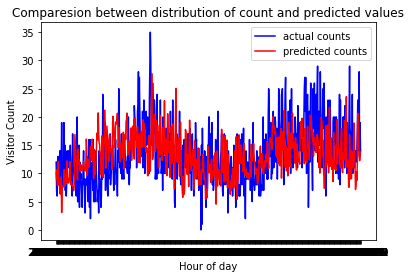

In [24]:
predVals = poisson_res.predict(X)

# plotting results
plt.plot(dff['date'], Y, 'b',label= 'actual counts')
plt.hold(True)
plt.plot(dff['date'], predVals, 'r-',label= 'predicted counts')
plt.legend()
plt.title('Comparesion between distribution of count and predicted values')
plt.xlabel('Hour of day')
plt.ylabel('Visitor Count')
plt.hold(False)

Text(0,0.5,'Visitor Count')

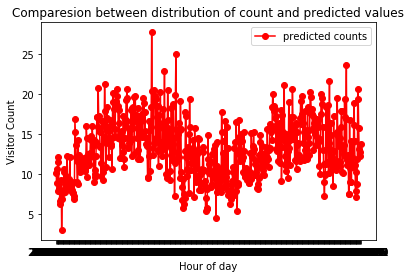

In [25]:
predVals = poisson_res.predict(X)

# plotting results
plt.plot(dff['date'], Y, 'bo',label= 'actual counts')
# plt.hold(True)
plt.plot(dff['date'], predVals, 'ro-',label= 'predicted counts')
plt.legend()
plt.title('Comparesion between distribution of count and predicted values')
plt.xlabel('Hour of day')
plt.ylabel('Visitor Count')
# plt.hold(False)

# General data investigation/vis

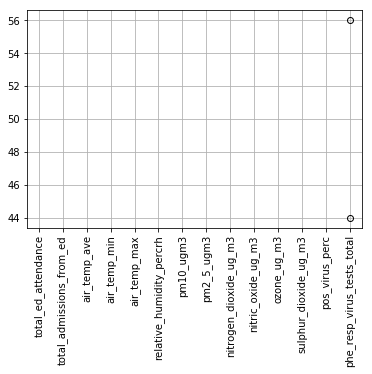

In [26]:
dff.boxplot(rot=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C0BC184780>,
      dtype=object)

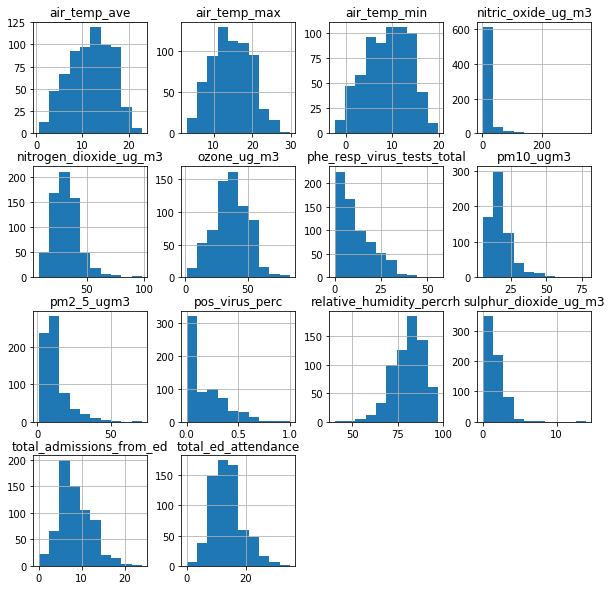

In [27]:
dff.hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F23CCF7400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F2417A46D8>]], dtype=object)

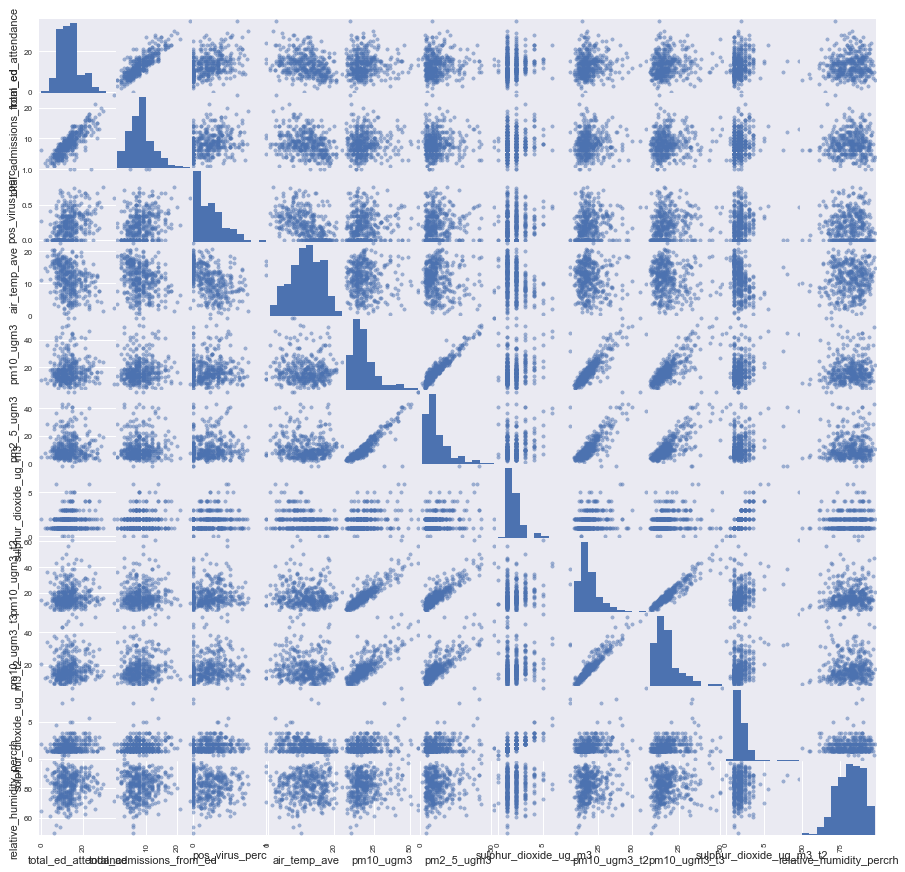

In [19]:
pd.scatter_matrix(dff,figsize=(15,15))

## Correlations

In [20]:
dff.corr(method='pearson')

,total_ed_attendance,total_admissions_from_ed,pos_virus_perc,air_temp_ave,pm10_ugm3,pm2_5_ugm3,sulphur_dioxide_ug_m3,pm10_ugm3_t2,pm10_ugm3_t3,sulphur_dioxide_ug_m3_t2,relative_humidity_percrh
total_ed_attendance,1.000000,0.842708,0.391413,-0.333078,0.040751,0.036554,0.127678,0.076035,0.114280,0.156176,0.088921
total_admissions_from_ed,0.842708,1.000000,0.309257,-0.297340,0.032742,0.029828,0.132953,0.072959,0.097162,0.172889,0.043169
pos_virus_perc,0.391413,0.309257,1.000000,-0.440411,0.069106,0.055336,0.134716,0.109731,0.129324,0.167623,-0.016770
air_temp_ave,-0.333078,-0.297340,-0.440411,1.000000,-0.069463,-0.112880,-0.293274,-0.091277,-0.118351,-0.311216,0.057320
pm10_ugm3,0.040751,0.032742,0.069106,-0.069463,1.000000,0.956531,0.305593,0.901511,0.811144,0.274283,0.033717
pm2_5_ugm3,0.036554,0.029828,0.055336,-0.112880,0.956531,1.000000,0.305819,0.879356,0.797495,0.271414,0.022989
sulphur_dioxide_ug_m3,0.127678,0.132953,0.134716,-0.293274,0.305593,0.305819,1.000000,0.274722,0.243920,0.811666,0.084858
pm10_ugm3_t2,0.076035,0.072959,0.109731,-0.091277,0.901511,0.879356,0.274722,1.000000,0.948709,0.346684,0.047091
pm10_ugm3_t3,0.114280,0.097162,0.129324,-0.118351,0.811144,0.797495,0.243920,0.948709,1.000000,0.335674,0.065521
sulphur_dioxide_ug_m3_t2,0.156176,0.172889,0.167623,-0.311216,0.274283,0.271414,0.811666,0.346684,0.335674,1.000000,0.057137


In [21]:
dff.corr(method='spearman')

,total_ed_attendance,total_admissions_from_ed,pos_virus_perc,air_temp_ave,pm10_ugm3,pm2_5_ugm3,sulphur_dioxide_ug_m3,pm10_ugm3_t2,pm10_ugm3_t3,sulphur_dioxide_ug_m3_t2,relative_humidity_percrh
total_ed_attendance,1.000000,0.822659,0.402519,-0.349444,0.086755,0.053969,0.153736,0.121626,0.159049,0.196230,0.085916
total_admissions_from_ed,0.822659,1.000000,0.341508,-0.293299,0.069768,0.045238,0.113037,0.093677,0.109897,0.149872,0.034349
pos_virus_perc,0.402519,0.341508,1.000000,-0.531661,0.098839,0.080149,0.224920,0.161951,0.196437,0.284727,-0.051070
air_temp_ave,-0.349444,-0.293299,-0.531661,1.000000,-0.043402,-0.065008,-0.310746,-0.079057,-0.122602,-0.394283,0.034889
pm10_ugm3,0.086755,0.069768,0.098839,-0.043402,1.000000,0.908644,0.226280,0.877800,0.791782,0.196876,0.067646
pm2_5_ugm3,0.053969,0.045238,0.080149,-0.065008,0.908644,1.000000,0.211454,0.822963,0.763317,0.160465,0.058013
sulphur_dioxide_ug_m3,0.153736,0.113037,0.224920,-0.310746,0.226280,0.211454,1.000000,0.240249,0.234516,0.780555,0.080180
pm10_ugm3_t2,0.121626,0.093677,0.161951,-0.079057,0.877800,0.822963,0.240249,1.000000,0.943620,0.273232,0.087951
pm10_ugm3_t3,0.159049,0.109897,0.196437,-0.122602,0.791782,0.763317,0.234516,0.943620,1.000000,0.292259,0.117697
sulphur_dioxide_ug_m3_t2,0.196230,0.149872,0.284727,-0.394283,0.196876,0.160465,0.780555,0.273232,0.292259,1.000000,0.056986


    TM: confidence interval for peason? -andy field

In [22]:
dff.corr(method='spearman')-dff.corr(method='pearson')

,total_ed_attendance,total_admissions_from_ed,pos_virus_perc,air_temp_ave,pm10_ugm3,pm2_5_ugm3,sulphur_dioxide_ug_m3,pm10_ugm3_t2,pm10_ugm3_t3,sulphur_dioxide_ug_m3_t2,relative_humidity_percrh
total_ed_attendance,0.000000,-0.020049,0.011106,-0.016366,0.046004,0.017415,0.026058,0.045591,0.044769,0.040054,-0.003004
total_admissions_from_ed,-0.020049,0.000000,0.032251,0.004041,0.037026,0.015410,-0.019916,0.020718,0.012735,-0.023017,-0.008820
pos_virus_perc,0.011106,0.032251,0.000000,-0.091251,0.029733,0.024813,0.090204,0.052220,0.067113,0.117104,-0.034300
air_temp_ave,-0.016366,0.004041,-0.091251,0.000000,0.026060,0.047872,-0.017473,0.012220,-0.004251,-0.083067,-0.022430
pm10_ugm3,0.046004,0.037026,0.029733,0.026060,0.000000,-0.047888,-0.079313,-0.023711,-0.019362,-0.077407,0.033929
pm2_5_ugm3,0.017415,0.015410,0.024813,0.047872,-0.047888,0.000000,-0.094365,-0.056393,-0.034178,-0.110949,0.035024
sulphur_dioxide_ug_m3,0.026058,-0.019916,0.090204,-0.017473,-0.079313,-0.094365,0.000000,-0.034473,-0.009404,-0.031111,-0.004679
pm10_ugm3_t2,0.045591,0.020718,0.052220,0.012220,-0.023711,-0.056393,-0.034473,0.000000,-0.005089,-0.073452,0.040860
pm10_ugm3_t3,0.044769,0.012735,0.067113,-0.004251,-0.019362,-0.034178,-0.009404,-0.005089,0.000000,-0.043414,0.052176
sulphur_dioxide_ug_m3_t2,0.040054,-0.023017,0.117104,-0.083067,-0.077407,-0.110949,-0.031111,-0.073452,-0.043414,0.000000,-0.000151


In [23]:
np.corrcoef(dff.total_ed_attendance, dff.pm10_ugm3)[0, 1]

0.040750529325055823

## Quick time-series plots

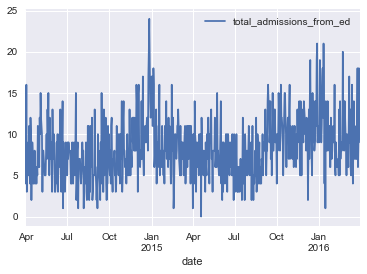

In [24]:
df.plot('date','total_admissions_from_ed')

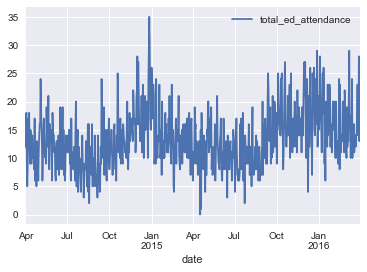

In [25]:
df.plot('date','total_ed_attendance')

# OLS - univariate regression against attendances and admissions

In [26]:
import statsmodels.formula.api as smf
import patsy

In [27]:
df.columns

Index(['date', 'total_ed_attendance', 'total_admissions_from_ed',
       'pos_virus_perc', 'air_temp_ave', 'pm10_ugm3', 'pm2_5_ugm3',
       'sulphur_dioxide_ug_m3', 'pm10_ugm3_t2', 'pm10_ugm3_t3',
       'sulphur_dioxide_ug_m3_t2', 'relative_humidity_percrh'],
      dtype='object')

### log and catagorise variables

In [28]:
df['pm10_ugm3_t3ln'] = np.log(df.pm10_ugm3_t3)

In [29]:
df['pos_virus_percln'] = np.log(df.pos_virus_perc)

C:\Anaconda3\envs\stable2\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [30]:
bins = df.pos_virus_perc.quantile([0.2,0.4,0.6,0.8]).values
bins = np.concatenate([[-1],bins,[1]])
bins

array([-1.        ,  0.        ,  0.14285714,  0.25      ,  0.375     ,  1.        ])

In [31]:
labels = [0,1,2,3,4]
df.loc[df.index,'pos_virus_percln'] = pd.cut(df.pos_virus_perc,bins = bins,labels = labels,right=True) ## using quantile bins

df.pos_virus_percln.value_counts(sort=False)

4.0    105
2.0    117
0.0    133
3.0    100
1.0     96
Name: pos_virus_percln, dtype: int64

In [35]:
import statsmodels as sm

In [ ]:
sm.graphics.

C:\Anaconda3\envs\stable2\lib\site-packages\matplotlib\text.py:2138: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


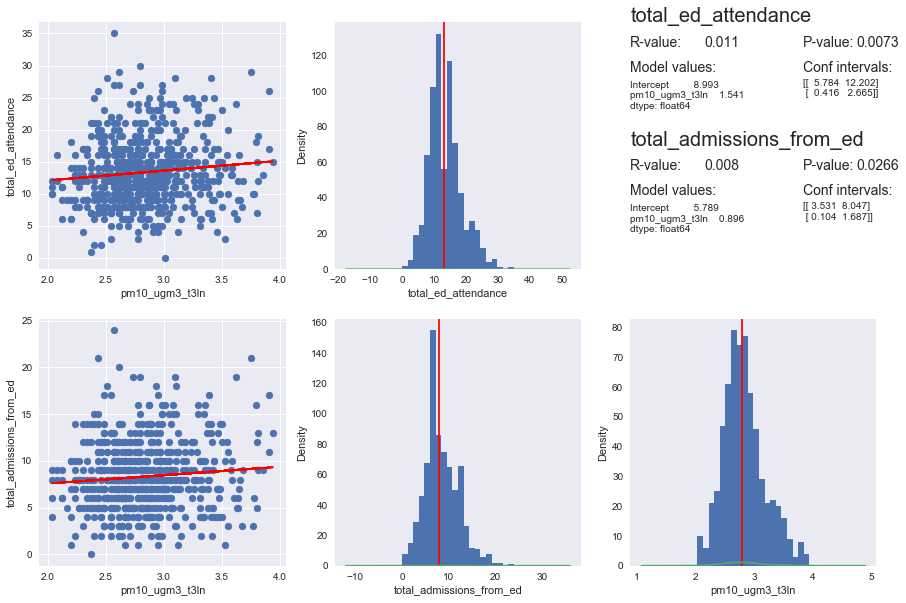

In [81]:
def test_regressions_year(df,year,x_var,plotting=False,ols_output=False,model_check=False):
    """
    Function to calculate and show OLS results
    """
    #### define the dependent variables
    y_var1 = 'total_ed_attendance'
    y_var2 = 'total_admissions_from_ed'
    nbins = 20
    
    #### filter for quarter and year
    dff = df
    #dff = df[(df['year'] == year)].copy()
    
    #### conduct regression
    ## y_var1
    lm1 = []
    lm1 = smf.ols(formula= y_var1 +' ~ ' + x_var, data=dff).fit()
    #dff.sort_values(x_var,inplace=True)
    x1=[]
    x1 = patsy.dmatrix(x_var, data=dff)
    preds1 = []
    preds1 = lm1.predict(x1, transform=False)
    
    ## y_var2
    lm2 = []
    #lm2 = smf.ols(formula= y_var2 +' ~ ' , data=dff).fit() # how test for null model?
    lm2 = smf.ols(formula= y_var2 +' ~ ' + x_var, data=dff).fit()
    #dff.sort_values(x_var,inplace=True)
    x2 = []
    x2 = patsy.dmatrix(x_var, data=dff)
    preds2 = []
    preds2 = lm2.predict(x2, transform=False)
    
    ## extract cook's D values
    lm1_cd = lm1.get_influence().cooks_distance[0]
    lm2_cd = lm2.get_influence().cooks_distance[0]
    ### lm.get_influence().dfbetas
    
    if plotting == True:
        #### Make plots
        fig1 = plt.figure(figsize=(15,10))

        #### y_var1
        ## scatter and regression line for y_var1
        ax1 = plt.subplot(231)
        ax1.scatter(x=dff[x_var], y = dff[y_var1])
        ax1.plot(x1[:,1],preds1,c='red') #### [:,1] removes the constant line at x = 1.0
        ax1.set_xlabel(x_var)
        ax1.set_ylabel(y_var1)

        ## histogram for y_var1
        ax2 = plt.subplot(232)
        ax2 = dff[y_var1].plot(kind = 'hist', bins = nbins)
        ax2.axvline(dff[y_var1].median(),color= 'r',label='median')
        ax2.set_xlabel(y_var1)
        ax2 = dff[y_var1].plot(kind='kde', grid=False,label='KDE')
        #ax2.legend(loc='upper left',frameon= True)
        #ax2.set_title('distribution of: %s' % (dv1_n))

        #### y_var2
        ## scatter and regression line for y_var2
        ax5 = plt.subplot(234)
        ax5.scatter(x=dff[x_var], y = dff[y_var2])
        ax5.plot(x2[:,1],preds2,c='red') #### [:,1] removes the constant line at x = 1.0
        ax5.set_xlabel(x_var)
        ax5.set_ylabel(y_var2)

        ## histogram for y_var1
        ax6 = plt.subplot(235)
        ax6 = dff[y_var2].plot(kind = 'hist', bins = nbins)
        ax6.axvline(dff[y_var2].median(),color= 'r',label='median')
        ax6.set_xlabel(y_var2)
        ax6 = dff[y_var2].plot(kind='kde', grid=False,label='KDE')
        #ax2.legend(loc='upper left',frameon= True)
        #ax2.set_title('distribution of: %s' % (dv1_n))

        #### x_var
        ## histogram for x_var
        ax3 = plt.subplot(236)
        ax3 = dff[x_var].plot(kind = 'hist', bins = nbins)
        ax3.axvline(dff[x_var].median(),color= 'r',label='median')
        ax3.set_xlabel(x_var)
        ax3 = dff[x_var].plot(kind='kde', grid=False,label='KDE')
        #ax2.legend(loc='upper left',frameon= True)
        #ax2.set_title('distribution of: %s' % (dv1_n))


        #### OLS output
        cd_thresh = 0.5
        ## set up axes and then clear it all
        ax4 = plt.subplot(233)
        ax4.clear()
        ax4.set_xticklabels([])
        ax4.set_yticklabels([])
        ax4.grid()
        ax4.set_facecolor((1, 1, 1))

        #### add details of regression to plot
        ## y_var1 details
        ax4.annotate(y_var1,xy = (0,1),textcoords='axes fraction',fontsize=20)
        #flag cooks-d
        #ax4.annotate("high Cook's-D val: " + str(len(lm1_cd[np.where(lm1_cd > cd_thresh)])),xy=(0.7,1),fontsize=14)

        ax4.annotate('R-value:',xy=(0,0.9),fontsize=14)
        ax4.annotate(lm1.rsquared.round(3) ,xy=(0.3,0.9),fontsize=14 )
        ax4.annotate('P-value:',xy=(0.7,0.9),fontsize=14)
        ax4.annotate("{:.4f}".format(lm1.pvalues.ix[x_var]) ,xy=(0.92,0.9),fontsize=14 )

        ax4.annotate('Model values:', xy=(0,0.8),fontsize=14)
        ax4.annotate(lm1.params.round(3),xy = (0,0.65),textcoords='axes fraction')
        ax4.annotate('Conf intervals:',xy=(0.7,0.8),fontsize=14)
        ax4.annotate(lm1.conf_int().values.round(3),xy = (0.7,0.7),textcoords='axes fraction')

        ## y_var2 details
        ax4.annotate(y_var2,xy = (0,0.5),textcoords='axes fraction',fontsize=20)
        #flag cooks-d
        #ax4.annotate("high Cook's-D val: " + str(len(lm2_cd[np.where(lm2_cd > cd_thresh)])),xy=(0.7,0.5),fontsize=14)

        ax4.annotate('R-value:',xy=(0,0.4),fontsize=14)
        ax4.annotate(lm2.rsquared.round(3) ,xy=(0.3,0.4),fontsize=14 )
        ax4.annotate('P-value:',xy=(0.7,0.4),fontsize=14)
        ax4.annotate("{:.4f}".format(lm2.pvalues.ix[x_var]) ,xy=(0.92,0.4),fontsize=14 )

        ax4.annotate('Model values:', xy=(0,0.3),fontsize=14)
        ax4.annotate(lm2.params.round(3),xy = (0,0.15),textcoords='axes fraction')
        ax4.annotate('Conf intervals:',xy=(0.7,0.3),fontsize=14)
        ax4.annotate(lm2.conf_int().values.round(3),xy = (0.7,0.2),textcoords='axes fraction')

    #### print regression details
    if ols_output == True:
        print(lm1.summary2())
        print(lm2.summary2())
    
    #### produce model checking plots
    if model_check == True:
        fig3 = plt.figure(figsize=(15,12))
        ## residuals plot
        ax8 = plt.subplot(321)
        plt.scatter(lm1.fittedvalues,lm1.resid,color='b',s=20,alpha=0.4)
        plt.plot([lm1.fittedvalues.min(),lm1.fittedvalues.max()],[0,0],color='r')
        ax8.set_xlabel('Fitted values')
        ax8.set_ylabel('Residuals')
        ax8.set_title('4-hour target model check')
        ax8.autoscale(enable=True,tight=True)
        
        ## qq ploting
        ax9 = plt.subplot(323)
        sm.graphics.qqplot(lm1.resid.values ,line='s',fit=True,ax=ax9)
        #ax9.set_title('4-hour target model check')
        
        ## Cooks D
        ax7 = plt.subplot(325)
        ax7.bar(np.arange(len(lm1_cd)),lm1_cd,color='b')
        ax7.set_ylabel("Cook's distance")
        #ax7.set_title('4 hr target')
        
        ## residuals plot
        ax10 = plt.subplot(322)
        plt.scatter(lm2.fittedvalues,lm2.resid,color='b',s=20,alpha=0.4)
        plt.plot([lm2.fittedvalues.min(),lm2.fittedvalues.max()],[0,0],color='r')
        ax10.set_xlabel('Fitted values')
        ax10.set_ylabel('Residuals')
        ax10.set_title('Cancelled electives model check')
        
        ## qq ploting
        ax11 = plt.subplot(324)
        sm.graphics.qqplot(lm2.resid.values ,line='s',fit=True,ax=ax11)
        #ax11.set_title('Cancelled electives model check')
        
        ## Cooks D
        ax7 = plt.subplot(326)
        ax7.bar(np.arange(len(lm2_cd)),lm2_cd, color='b')
        ax7.set_ylabel("Cook's distance")
        #ax7.set_title('Cancelled electives')
        
    return(lm1,lm2)
#['v_dbed_occ','v_nbed_occ', 'v_dt_per_dbed', 'v_dnbed_ratio', 'v_ae_conv','v_emelecadm_ratio', 'v_emadm_bed_ratio']
#'air_temp_ave' , 'pm10_ugm3_t3ln', 'pos_virus_perc'
lm1,lm2 = test_regressions_year(df,2016,'pm10_ugm3_t3ln',plotting=True,ols_output=False,model_check=False)

## Multivariate regression

In [39]:
def multi_regressions_year(df,year):
    """
    Function to calculate and show OLS results
    """
    #### define the dependent variables
    y_var1 = 'total_ed_attendance'
#    y_var1 = 'total_admissions_from_ed'
    
    #### filter for quarter and year
    dff = df
    #dff = df[(df['year'] == year)].copy()
    
    #### make model
    lm = []
#    lm = smf.ols(formula= y_var1 +' ~ ' + x_vars, data=dff).fit()
#    lm = smf.ols(formula= y_var1 +' ~ ' + 'v_nbed_occ + v_ae_conv', data=dff).fit()

#    lm = smf.ols(formula= y_var2 +' ~ ' + x_vars, data=dff).fit()

#    lm = smf.ols(formula= y_var1 +' ~ ' + ' pm10_ugm3_t3ln + air_temp_ave + relative_humidity_percrh', data=dff).fit()
    lm = smf.ols(formula= y_var1 +' ~ ' + ' pm10_ugm3_t3ln + air_temp_ave + pos_virus_percln + relative_humidity_percrh', data=dff).fit()
#    lm = smf.ols(formula= y_var1 +' ~ ' + ' air_temp_ave + pos_virus_percln', data=dff).fit()    

#    lm = smf.ols(formula= y_var1 +' ~ ' + ' pm10_ugm3_t3ln + air_temp_ave ', data=dff).fit()
#    lm = smf.ols(formula= y_var1 +' ~ ' + ' air_temp_ave + relative_humidity_percrh', data=dff).fit()

    #dff.sort_values(x_var,inplace=True)
    #x1=[]
    #x1 = patsy.dmatrix(x_var, data=dff)
    #preds1 = []
    #preds1 = lm1.predict(x1, transform=False)
    
    print(lm.summary2())
    
    #X = dff['v_4']
    #y = dff[y_var1]
    #
    #X = sm.add_constant(X)
    #lm = sm.OLS(y,X).fit()
    
    #est = smf.ols(formula='y_var1 ~ TV + Radio',data=dff).fit()
    
    return(lm)

lm = multi_regressions_year(df,2016)

                    Results: Ordinary least squares
Model:               OLS                  Adj. R-squared:      0.181    
Dependent Variable:  total_ed_attendance  AIC:                 2360.8704
Date:                2017-07-12 15:09     BIC:                 2380.7648
No. Observations:    395                  Log-Likelihood:      -1175.4  
Df Model:            4                    F-statistic:         22.79    
Df Residuals:        390                  Prob (F-statistic):  6.15e-17 
R-squared:           0.189                Scale:               22.793   
------------------------------------------------------------------------
                          Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------------
Intercept                 7.0607   2.9245  2.4144 0.0162  1.3110 12.8104
pm10_ugm3_t3ln            0.5637   0.6653  0.8472 0.3974 -0.7443  1.8717
air_temp_ave             -0.2117   0.0622 -3.4036 0.0007 -0.3339 -0.0894

In [40]:
np.sqrt(0.174)

0.41713307229228419

In [41]:
np.sqrt(0.160)

0.40000000000000002

In [42]:
np.log(1.38)*1.47

0.47346274377859643

#### conclusions - air temp and humidity are much stronger signals!!

In [43]:
df.columns

Index(['date', 'total_ed_attendance', 'total_admissions_from_ed',
       'pos_virus_perc', 'air_temp_ave', 'pm10_ugm3', 'pm2_5_ugm3',
       'sulphur_dioxide_ug_m3', 'pm10_ugm3_t2', 'pm10_ugm3_t3',
       'sulphur_dioxide_ug_m3_t2', 'relative_humidity_percrh',
       'pm10_ugm3_t3ln', 'pos_virus_percln'],
      dtype='object')

# Posisson regression

In [ ]:
import statsmodels.discrete.discrete_model.Poisson as smp

In [ ]:
smf.GLM

# Timeseries decomp

In [44]:
df = df.set_index('date')

In [45]:
import statsmodels.api as sm

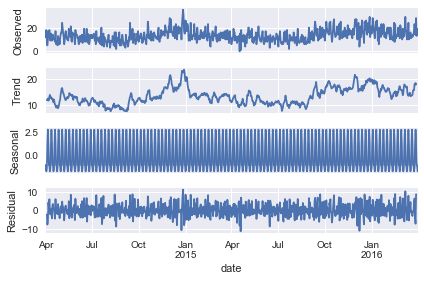

In [46]:
res = sm.tsa.seasonal_decompose(df.total_ed_attendance.interpolate(),
 freq=7,
 model='additive')
resplot = res.plot()

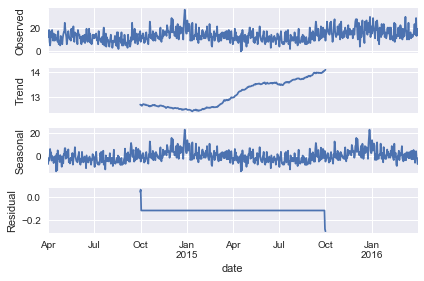

In [47]:
res = sm.tsa.seasonal_decompose(df.total_ed_attendance.interpolate(),
 freq=365,
 model='additive')
resplot = res.plot()

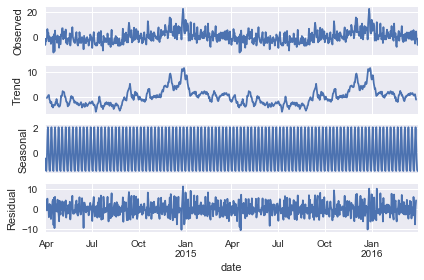

In [48]:
res = sm.tsa.seasonal_decompose((res.seasonal).dropna().interpolate(),
 freq=7,
 model='additive')
resplot = res.plot()

res = sm.tsa.seasonal_decompose((res.seasonal).dropna().interpolate(),
 freq=7,
 model='additive')
resplot = res.plot()

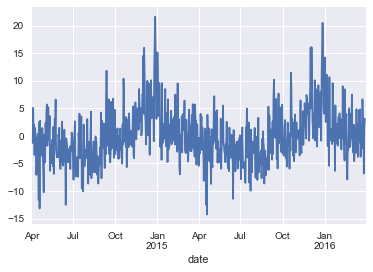

In [49]:
(res.trend+res.resid).plot()

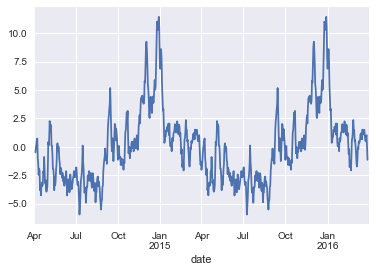

In [50]:
(res.trend).plot()

#### check correlations

In [51]:
dff = df.merge(pd.DataFrame(res.trend+res.resid),left_index=True,right_index=True)

In [52]:
dff = dff.dropna(how='any')

In [53]:
dff.head(1)

,total_ed_attendance_x,total_admissions_from_ed,pos_virus_perc,air_temp_ave,pm10_ugm3,pm2_5_ugm3,sulphur_dioxide_ug_m3,pm10_ugm3_t2,pm10_ugm3_t3,sulphur_dioxide_ug_m3_t2,relative_humidity_percrh,pm10_ugm3_t3ln,pos_virus_percln,total_ed_attendance_y
date,,,,,,,,,,,,,,
2014-06-04,12,3,0.166667,10.83,9.0,6.0,2.0,10.5,12.0,2.0,75.5,2.484907,2.0,-5.990827


In [54]:
np.corrcoef(dff.total_ed_attendance_x, dff.pm10_ugm3)[0, 1]

0.040750529325055823

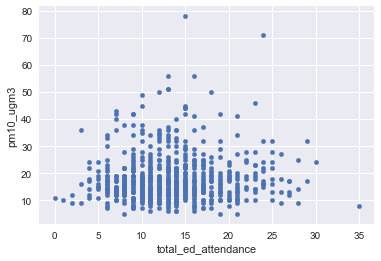

In [55]:
df.plot(x='total_ed_attendance',y='pm10_ugm3',kind='scatter')

In [56]:
np.corrcoef(dff.total_ed_attendance_y, dff.pm10_ugm3)[0, 1]

0.16692088169135696

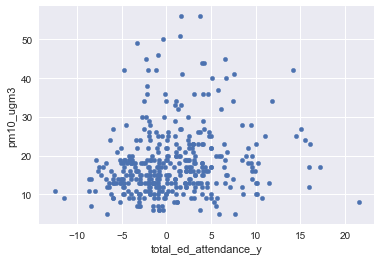

In [57]:
dff.plot(x='total_ed_attendance_y',y='pm10_ugm3',kind='scatter')

In [58]:
np.corrcoef(dff.total_ed_attendance_y, dff.pm10_ugm3_t2)[0, 1]

0.19230681709038303

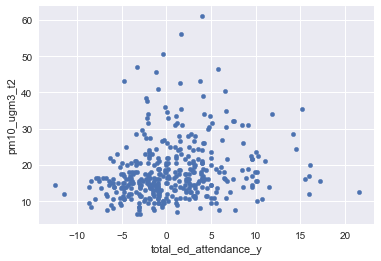

In [59]:
dff.plot(x='total_ed_attendance_y',y='pm10_ugm3_t2',kind='scatter')

In [60]:
np.corrcoef(dff.total_ed_attendance_y, dff.pm10_ugm3_t3)[0, 1]

0.21448565843481332

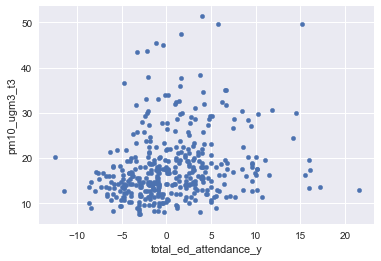

In [61]:
dff.plot(x='total_ed_attendance_y',y='pm10_ugm3_t3',kind='scatter')

In [62]:
np.corrcoef(dff.total_ed_attendance_x, dff.sulphur_dioxide_ug_m3)[0, 1]

0.12767793720084375

In [63]:
np.corrcoef(dff.total_ed_attendance_y, dff.sulphur_dioxide_ug_m3)[0, 1]

0.091795035233467825

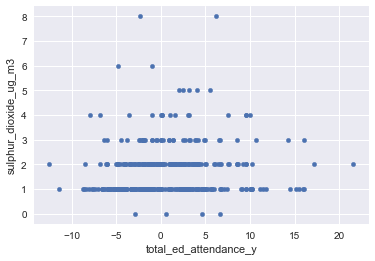

In [64]:
dff.plot(x='total_ed_attendance_y',y='sulphur_dioxide_ug_m3',kind='scatter')

In [65]:
np.corrcoef(dff.total_ed_attendance_y, dff.sulphur_dioxide_ug_m3_t2)[0, 1]

0.13801206296738266

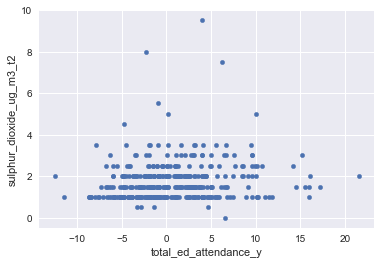

In [66]:
dff.plot(x='total_ed_attendance_y',y='sulphur_dioxide_ug_m3_t2',kind='scatter')

In [67]:
np.corrcoef(dff.total_ed_attendance_y, dff.pm10_ugm3_t2)[0, 1]

0.19230681709038303

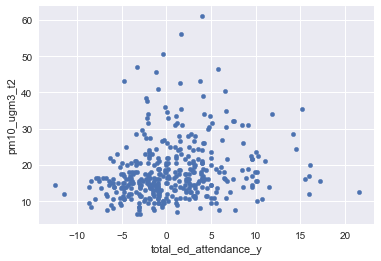

In [68]:
dff.plot(x='total_ed_attendance_y',y='pm10_ugm3_t2',kind='scatter')

In [69]:
dff['pm10_ugm3_t3_ln'] = np.log(dff.pm10_ugm3_t3)

In [70]:
dff['sulphur_dioxide_ug_m3_t2_ln'] = np.log(dff.sulphur_dioxide_ug_m3_t2)

C:\Anaconda3\envs\stable2\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [78]:
dff.corr()

,total_ed_attendance_x,total_admissions_from_ed,pos_virus_perc,air_temp_ave,pm10_ugm3,pm2_5_ugm3,sulphur_dioxide_ug_m3,pm10_ugm3_t2,pm10_ugm3_t3,sulphur_dioxide_ug_m3_t2,relative_humidity_percrh,pm10_ugm3_t3ln,pos_virus_percln,total_ed_attendance_y,pm10_ugm3_t3_ln,sulphur_dioxide_ug_m3_t2_ln
total_ed_attendance_x,1.000000,0.842708,0.391413,-0.333078,0.040751,0.036554,0.127678,0.076035,0.114280,0.156176,0.088921,0.130545,0.386650,0.727967,0.130545,0.180001
total_admissions_from_ed,0.842708,1.000000,0.309257,-0.297340,0.032742,0.029828,0.132953,0.072959,0.097162,0.172889,0.043169,0.101876,0.332985,0.631174,0.101876,0.172095
pos_virus_perc,0.391413,0.309257,1.000000,-0.440411,0.069106,0.055336,0.134716,0.109731,0.129324,0.167623,-0.016770,0.152541,0.933349,0.387351,0.152541,0.210106
air_temp_ave,-0.333078,-0.297340,-0.440411,1.000000,-0.069463,-0.112880,-0.293274,-0.091277,-0.118351,-0.311216,0.057320,-0.120556,-0.530993,-0.314818,-0.120556,-0.360944
pm10_ugm3,0.040751,0.032742,0.069106,-0.069463,1.000000,0.956531,0.305593,0.901511,0.811144,0.274283,0.033717,0.799156,0.096861,0.166921,0.799156,0.217691
pm2_5_ugm3,0.036554,0.029828,0.055336,-0.112880,0.956531,1.000000,0.305819,0.879356,0.797495,0.271414,0.022989,0.769822,0.075258,0.162028,0.769822,0.206660
sulphur_dioxide_ug_m3,0.127678,0.132953,0.134716,-0.293274,0.305593,0.305819,1.000000,0.274722,0.243920,0.811666,0.084858,0.261426,0.172302,0.091795,0.261426,0.781610
pm10_ugm3_t2,0.076035,0.072959,0.109731,-0.091277,0.901511,0.879356,0.274722,1.000000,0.948709,0.346684,0.047091,0.919313,0.148735,0.192307,0.919313,0.275508
pm10_ugm3_t3,0.114280,0.097162,0.129324,-0.118351,0.811144,0.797495,0.243920,0.948709,1.000000,0.335674,0.065521,0.967972,0.165008,0.214486,0.967972,0.277694
sulphur_dioxide_ug_m3_t2,0.156176,0.172889,0.167623,-0.311216,0.274283,0.271414,0.811666,0.346684,0.335674,1.000000,0.057137,0.329194,0.212625,0.138012,0.329194,0.923861


In [80]:
dff.corr('spearman')[['total_ed_attendance_x','total_ed_attendance_y']]

,total_ed_attendance_x,total_ed_attendance_y
total_ed_attendance_x,1.000000,0.702160
total_admissions_from_ed,0.822659,0.584027
pos_virus_perc,0.402519,0.402490
air_temp_ave,-0.349444,-0.325195
pm10_ugm3,0.086755,0.195238
pm2_5_ugm3,0.053969,0.177224
sulphur_dioxide_ug_m3,0.153736,0.129814
pm10_ugm3_t2,0.121626,0.240350
pm10_ugm3_t3,0.159049,0.258797
sulphur_dioxide_ug_m3_t2,0.196230,0.177774


## OLS - univariate of time series decomopsed data

C:\Anaconda3\envs\stable2\lib\site-packages\matplotlib\text.py:2138: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


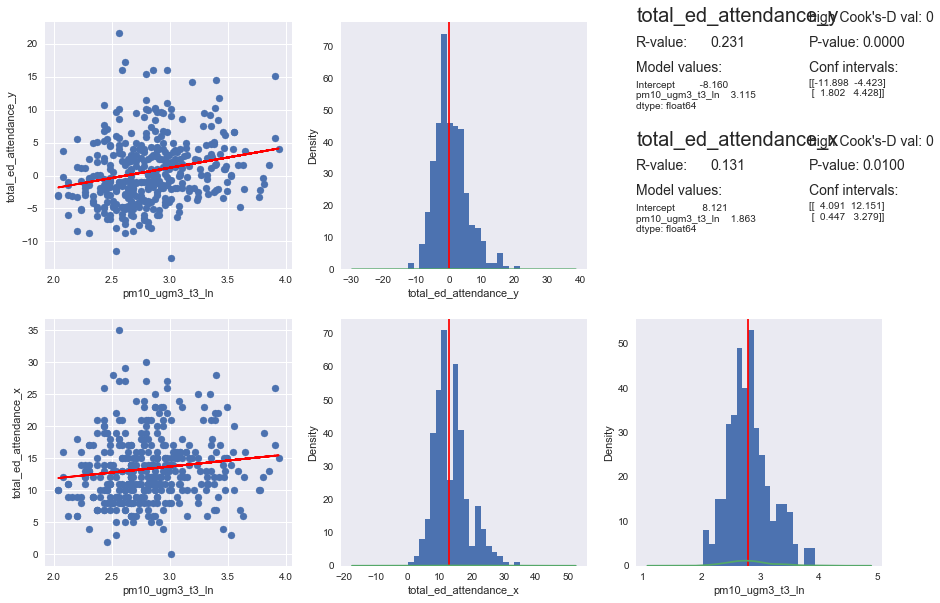

In [71]:
def test_regressions_year(df,year,x_var,plotting=False,ols_output=False,model_check=False):
    """
    Function to calculate and show OLS results
    """
    #### define the dependent variables
    y_var1 = 'total_ed_attendance_y'
    y_var2 = 'total_ed_attendance_x'
    nbins = 20
    
    #### filter for quarter and year
    dff = df
    #dff = df[(df['year'] == year)].copy()
    
    #### conduct regression
    ## y_var1
    lm1 = []
    lm1 = smf.ols(formula= y_var1 +' ~ ' + x_var, data=dff).fit()
    #dff.sort_values(x_var,inplace=True)
    x1=[]
    x1 = patsy.dmatrix(x_var, data=dff)
    preds1 = []
    preds1 = lm1.predict(x1, transform=False)
    
    ## y_var2
    lm2 = []
    #lm2 = smf.ols(formula= y_var2 +' ~ ' , data=dff).fit() # how test for null model?
    lm2 = smf.ols(formula= y_var2 +' ~ ' + x_var, data=dff).fit()
    #dff.sort_values(x_var,inplace=True)
    x2 = []
    x2 = patsy.dmatrix(x_var, data=dff)
    preds2 = []
    preds2 = lm2.predict(x2, transform=False)
    
    ## extract cook's D values
    lm1_cd = lm1.get_influence().cooks_distance[0]
    lm2_cd = lm2.get_influence().cooks_distance[0]
    ### lm.get_influence().dfbetas
    
    if plotting == True:
        #### Make plots
        fig1 = plt.figure(figsize=(15,10))

        #### y_var1
        ## scatter and regression line for y_var1
        ax1 = plt.subplot(231)
        ax1.scatter(x=dff[x_var], y = dff[y_var1])
        ax1.plot(x1[:,1],preds1,c='red') #### [:,1] removes the constant line at x = 1.0
        ax1.set_xlabel(x_var)
        ax1.set_ylabel(y_var1)

        ## histogram for y_var1
        ax2 = plt.subplot(232)
        ax2 = dff[y_var1].plot(kind = 'hist', bins = nbins)
        ax2.axvline(dff[y_var1].median(),color= 'r',label='median')
        ax2.set_xlabel(y_var1)
        ax2 = dff[y_var1].plot(kind='kde', grid=False,label='KDE')
        #ax2.legend(loc='upper left',frameon= True)
        #ax2.set_title('distribution of: %s' % (dv1_n))

        #### y_var2
        ## scatter and regression line for y_var2
        ax5 = plt.subplot(234)
        ax5.scatter(x=dff[x_var], y = dff[y_var2])
        ax5.plot(x2[:,1],preds2,c='red') #### [:,1] removes the constant line at x = 1.0
        ax5.set_xlabel(x_var)
        ax5.set_ylabel(y_var2)

        ## histogram for y_var1
        ax6 = plt.subplot(235)
        ax6 = dff[y_var2].plot(kind = 'hist', bins = nbins)
        ax6.axvline(dff[y_var2].median(),color= 'r',label='median')
        ax6.set_xlabel(y_var2)
        ax6 = dff[y_var2].plot(kind='kde', grid=False,label='KDE')
        #ax2.legend(loc='upper left',frameon= True)
        #ax2.set_title('distribution of: %s' % (dv1_n))

        #### x_var
        ## histogram for x_var
        ax3 = plt.subplot(236)
        ax3 = dff[x_var].plot(kind = 'hist', bins = nbins)
        ax3.axvline(dff[x_var].median(),color= 'r',label='median')
        ax3.set_xlabel(x_var)
        ax3 = dff[x_var].plot(kind='kde', grid=False,label='KDE')
        #ax2.legend(loc='upper left',frameon= True)
        #ax2.set_title('distribution of: %s' % (dv1_n))


        #### OLS output
        cd_thresh = 0.5
        ## set up axes and then clear it all
        ax4 = plt.subplot(233)
        ax4.clear()
        ax4.set_xticklabels([])
        ax4.set_yticklabels([])
        ax4.grid()
        ax4.set_facecolor((1, 1, 1))

        #### add details of regression to plot
        ## y_var1 details
        ax4.annotate(y_var1,xy = (0,1),textcoords='axes fraction',fontsize=20)
        #flag cooks-d
        ax4.annotate("high Cook's-D val: " + str(len(lm1_cd[np.where(lm1_cd > cd_thresh)])),xy=(0.7,1),fontsize=14)

        ax4.annotate('R-value:',xy=(0,0.9),fontsize=14)
        ax4.annotate(np.sqrt(lm1.rsquared).round(3) ,xy=(0.3,0.9),fontsize=14 )
        ax4.annotate('P-value:',xy=(0.7,0.9),fontsize=14)
        ax4.annotate("{:.4f}".format(lm1.pvalues.ix[x_var]) ,xy=(0.92,0.9),fontsize=14 )

        ax4.annotate('Model values:', xy=(0,0.8),fontsize=14)
        ax4.annotate(lm1.params.round(3),xy = (0,0.65),textcoords='axes fraction')
        ax4.annotate('Conf intervals:',xy=(0.7,0.8),fontsize=14)
        ax4.annotate(lm1.conf_int().values.round(3),xy = (0.7,0.7),textcoords='axes fraction')

        ## y_var2 details
        ax4.annotate(y_var2,xy = (0,0.5),textcoords='axes fraction',fontsize=20)
        #flag cooks-d
        ax4.annotate("high Cook's-D val: " + str(len(lm2_cd[np.where(lm2_cd > cd_thresh)])),xy=(0.7,0.5),fontsize=14)

        ax4.annotate('R-value:',xy=(0,0.4),fontsize=14)
        ax4.annotate(np.sqrt(lm2.rsquared).round(3) ,xy=(0.3,0.4),fontsize=14 )
        ax4.annotate('P-value:',xy=(0.7,0.4),fontsize=14)
        ax4.annotate("{:.4f}".format(lm2.pvalues.ix[x_var]) ,xy=(0.92,0.4),fontsize=14 )

        ax4.annotate('Model values:', xy=(0,0.3),fontsize=14)
        ax4.annotate(lm2.params.round(3),xy = (0,0.15),textcoords='axes fraction')
        ax4.annotate('Conf intervals:',xy=(0.7,0.3),fontsize=14)
        ax4.annotate(lm2.conf_int().values.round(3),xy = (0.7,0.2),textcoords='axes fraction')

    #### print regression details
    if ols_output == True:
        print(lm1.summary2())
        print(lm2.summary2())
    
    #### produce model checking plots
    if model_check == True:
        fig3 = plt.figure(figsize=(15,12))
        ## residuals plot
        ax8 = plt.subplot(321)
        plt.scatter(lm1.fittedvalues,lm1.resid,color='b',s=20,alpha=0.4)
        plt.plot([lm1.fittedvalues.min(),lm1.fittedvalues.max()],[0,0],color='r')
        ax8.set_xlabel('Fitted values')
        ax8.set_ylabel('Residuals')
        ax8.set_title('4-hour target model check')
        ax8.autoscale(enable=True,tight=True)
        
        ## qq ploting
        ax9 = plt.subplot(323)
        sm.graphics.qqplot(lm1.resid.values ,line='s',fit=True,ax=ax9)
        #ax9.set_title('4-hour target model check')
        
        ## Cooks D
        ax7 = plt.subplot(325)
        ax7.bar(np.arange(len(lm1_cd)),lm1_cd,color='b')
        ax7.set_ylabel("Cook's distance")
        #ax7.set_title('4 hr target')
        
        ## residuals plot
        ax10 = plt.subplot(322)
        plt.scatter(lm2.fittedvalues,lm2.resid,color='b',s=20,alpha=0.4)
        plt.plot([lm2.fittedvalues.min(),lm2.fittedvalues.max()],[0,0],color='r')
        ax10.set_xlabel('Fitted values')
        ax10.set_ylabel('Residuals')
        ax10.set_title('Cancelled electives model check')
        
        ## qq ploting
        ax11 = plt.subplot(324)
        sm.graphics.qqplot(lm2.resid.values ,line='s',fit=True,ax=ax11)
        #ax11.set_title('Cancelled electives model check')
        
        ## Cooks D
        ax7 = plt.subplot(326)
        ax7.bar(np.arange(len(lm2_cd)),lm2_cd, color='b')
        ax7.set_ylabel("Cook's distance")
        #ax7.set_title('Cancelled electives')
        
    return(lm1,lm2)
#['v_dbed_occ','v_nbed_occ', 'v_dt_per_dbed', 'v_dnbed_ratio', 'v_ae_conv','v_emelecadm_ratio', 'v_emadm_bed_ratio']
lm1,lm2 = test_regressions_year(dff,2016,'pm10_ugm3_t3_ln',plotting=True,ols_output=False,model_check=False)

In [72]:
dff.columns

Index(['total_ed_attendance_x', 'total_admissions_from_ed', 'pos_virus_perc',
       'air_temp_ave', 'pm10_ugm3', 'pm2_5_ugm3', 'sulphur_dioxide_ug_m3',
       'pm10_ugm3_t2', 'pm10_ugm3_t3', 'sulphur_dioxide_ug_m3_t2',
       'relative_humidity_percrh', 'pm10_ugm3_t3ln', 'pos_virus_percln',
       'total_ed_attendance_y', 'pm10_ugm3_t3_ln',
       'sulphur_dioxide_ug_m3_t2_ln'],
      dtype='object')

In [73]:
lm1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
=======================================================================
Model:              OLS                   Adj. R-squared:     0.051    
Dependent Variable: total_ed_attendance_y AIC:                2331.5577
Date:               2017-07-12 15:14      BIC:                2339.4798
No. Observations:   388                   Log-Likelihood:     -1163.8  
Df Model:           1                     F-statistic:        21.76    
Df Residuals:       386                   Prob (F-statistic): 4.27e-06 
R-squared:          0.053                 Scale:              23.716   
------------------------------------------------------------------------
                    Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------------
Intercept          -8.1603    1.9010  -4.2926  0.0000  -11.8979  -4.4227
pm10_ugm3_t3_ln     3.1151    0.6678   4.6645  0.0000    1.8020   4.4281
-----------------------------------------------------------------------
Omnibus:                51.697         Durbin-Watson:            1.299 
Prob(Omnibus):          0.000          Jarque-Bera (JB):         79.888
Skew:                   0.842          Prob(JB):                 0.000 
Kurtosis:               4.451          Condition No.:            25    
=======================================================================

"""

In [74]:
np.sqrt(0.174)

0.41713307229228419

In [75]:
np.sqrt(0.21)

0.45825756949558399

#### for unlogged
pm10_t3 = 0.1411

so for every additonal 10 micrograms of pm10 (mean over 3 days) we see additional 1.4 ED attendances


In [82]:
#### for logged yearly and weekly seasonal decomp of attendances
3.1151*np.log(1.38)

1.0033223082617047

In [83]:
#### for logged weekly seasonal decomp
2.03*np.log(1.65)

1.0165738344623529

....for periods when there is 40% increase in pm10 ( over 3 days) we see an increase in number of resp attendances of 1

In [84]:
dff.pm10_ugm3_t3.describe()

count    388.000000
mean      18.091065
std        7.600320
min        7.666667
25%       13.000000
50%       16.333333
75%       20.333333
max       51.333333
Name: pm10_ugm3_t3, dtype: float64

In [85]:
16.3*1.4

22.82

In [86]:
dff.pm10_ugm3_t3.quantile(0.8)

22.0

In [87]:
dff.total_ed_attendance_x.describe()

count    388.000000
mean      13.378866
std        5.289380
min        0.000000
25%       10.000000
50%       13.000000
75%       16.000000
max       35.000000
Name: total_ed_attendance_x, dtype: float64

In [88]:
dff.total_ed_attendance_x.sum()

5191

In [89]:
dff.total_admissions_from_ed.describe()

count    388.000000
mean       8.340206
std        3.699673
min        1.000000
25%        6.000000
50%        8.000000
75%       10.000000
max       24.000000
Name: total_admissions_from_ed, dtype: float64

# multi-regression on seasonally decomposed

In [90]:
def multi_regressions_year(df,year):
    """
    Function to calculate and show OLS results
    """
    #### define the dependent variables
    y_var1 = 'total_ed_attendance_y'
#    y_var1 = 'total_admissions_from_ed'
    
    #### filter for quarter and year
    dff = df
    #dff = df[(df['year'] == year)].copy()
    
    #### make model
    lm = []
#    lm = smf.ols(formula= y_var1 +' ~ ' + x_vars, data=dff).fit()
#    lm = smf.ols(formula= y_var1 +' ~ ' + 'v_nbed_occ + v_ae_conv', data=dff).fit()

#    lm = smf.ols(formula= y_var2 +' ~ ' + x_vars, data=dff).fit()

#    lm = smf.ols(formula= y_var1 +' ~ ' + ' pm10_ugm3_t3ln + air_temp_ave + relative_humidity_percrh', data=dff).fit()
    lm = smf.ols(formula= y_var1 +' ~ ' + ' pm10_ugm3_t3ln + air_temp_ave + pos_virus_percln + relative_humidity_percrh', data=dff).fit()
#    lm = smf.ols(formula= y_var1 +' ~ ' + ' air_temp_ave + pos_virus_percln', data=dff).fit()    

#    lm = smf.ols(formula= y_var1 +' ~ ' + ' pm10_ugm3_t3ln + air_temp_ave ', data=dff).fit()
#    lm = smf.ols(formula= y_var1 +' ~ ' + ' air_temp_ave + relative_humidity_percrh', data=dff).fit()

    #dff.sort_values(x_var,inplace=True)
    #x1=[]
    #x1 = patsy.dmatrix(x_var, data=dff)
    #preds1 = []
    #preds1 = lm1.predict(x1, transform=False)
    
    print(lm.summary2())
    
    #X = dff['v_4']
    #y = dff[y_var1]
    #
    #X = sm.add_constant(X)
    #lm = sm.OLS(y,X).fit()
    
    #est = smf.ols(formula='y_var1 ~ TV + Radio',data=dff).fit()
    
    return(lm)

lm = multi_regressions_year(dff,2016)

                     Results: Ordinary least squares
Model:               OLS                    Adj. R-squared:      0.210    
Dependent Variable:  total_ed_attendance_y  AIC:                 2263.3896
Date:                2017-07-12 15:32       BIC:                 2283.1947
No. Observations:    388                    Log-Likelihood:      -1126.7  
Df Model:            4                      F-statistic:         26.70    
Df Residuals:        383                    Prob (F-statistic):  1.49e-19 
R-squared:           0.218                  Scale:               19.743   
--------------------------------------------------------------------------
                          Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
--------------------------------------------------------------------------
Intercept                -11.4951   2.7571 -4.1693 0.0000 -16.9160 -6.0741
pm10_ugm3_t3ln             1.9087   0.6250  3.0541 0.0024   0.6799  3.1375
air_temp_ave              -0.1586   0.0584 -2.7

# Dev

In [ ]:
break

In [ ]:
res.resid.shape

In [ ]:
df.pm10_ugm3.shape

In [ ]:
df

## Autocorrelation func

In [ ]:
import statsmodels as sm

In [ ]:
pd.DataFrame(sm.tsa.stattools.acf(df.total_ed_attendance)).plot()

In [ ]:
pd.DataFrame(sm.tsa.stattools.acf(dff.total_ed_attendance_x)).plot()

In [ ]:
pd.DataFrame(sm.tsa.stattools.acf(df.total_admissions_from_ed)).plot()

## cross correlation function

In [ ]:
pd.DataFrame(sm.tsa.stattools.ccf(df.total_admissions_from_ed,df.total_ed_attendance)).plot()

In [ ]:
df.plot('date','pm10_ugm3')